# Q4

In [206]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import sys

Data consists of 24 different colours with shades of Red, Blue, Green, Teal, Yellow and Pink chosen from https://www.rapidtables.com/web/color/RGB_Color.html. In the data matrix, each row contains the RGB values of that particular color. We are given an initial gird of 100x100 neurons with random weights to which we have to map the color shades. 

In [207]:
data = (24,3)
data = np.zeros(data)

#Firebrick 
data[0][0] = 178
data[0][1] = 34
data[0][2] = 34

#Indian Red
data[1][0] = 205
data[1][1] = 92
data[1][2] = 92

#Brown
data[2][0] = 165
data[2][1] = 42
data[2][2] = 42

#Coral
data[3][0] = 255
data[3][1] = 127
data[3][2] = 80

#Red
data[4][0] = 255
data[4][1] = 0
data[4][2] = 0

#Salmon
250,128,114
data[5][0] = 250
data[5][1] = 128
data[5][2] = 114

#Chart Reuse
127,255,0
data[6][0] = 127
data[6][1] = 255
data[6][2] = 0

#Lawn Green
data[7][0] = 124
data[7][1] = 252
data[7][2] = 0

#Dark Green
data[8][0] = 0
data[8][1] = 100
data[8][2] = 0

#Lime
data[9][0] = 0 
data[9][1] = 255
data[9][2] = 0

#Spring Green
0,255,127
data[10][0] = 0
data[10][1] = 255
data[10][2] = 127

#Medium Sea Green
data[11][0] = 60
data[11][1] = 179
data[11][2] = 113

#Powder Blue
data[12][0] = 176
data[12][1] = 224
data[12][2] = 230

#Cadet Blue
data[13][0] = 92
data[13][1] = 158
data[13][2] = 160

#Midnight Blue
data[14][0] = 25
data[14][1] = 25
data[14][2] = 112

#Blue
data[15][0] = 0
data[15][1] = 0
data[15][2] = 255

#Light Sky Blue
data[16][0] = 135
data[16][1] = 206
data[16][2] = 250

#Navy
data[17][0] = 0
data[17][1] = 0
data[17][2] = 128

#Gold
data[18][0] = 255
data[18][1] = 215
data[18][2] = 0

#Yellow
data[19][0] = 255 
data[19][1] = 255 
data[19][2] = 0

#Deep Pink
data[20][0] = 255
data[20][1] = 20
data[20][2] = 147

#Hot Pink
data[21][0] = 255
data[21][1] = 105
data[21][2] = 180

#Teal
data[22][0] = 0
data[22][1] = 128
data[22][2] = 128

#Aqua
data[23][0] = 0
data[23][1] = 255
data[23][2] = 255


Now, initialize the parameters that will be used in the training process. There is 𝜎0 = 1, 10, 30, 50, 70 and 𝜶0 = 0.8 (Initial Learning Rate) and number of epochs = 1000. 

In [208]:
epochs = 1000
initial_lr = 0.8
#If you want to change sigma, give the value in this list
sigmas = [1, 10, 30, 50, 70]

Now, I normalise the data to calibrate the R, G, B codes to values between 0 and 1, instead of being between 0 and 255. This will make the calculations easy and the training process faster. 

In [209]:
data = data/255
print(data.shape)

(24, 3)


This function decides the winning neuron from all the neurons in 100x100 grid by calculating the distance of the input vectors to all the neurons using Euclidean Norm and then finding the minimum of all those distances. The neuron with minimum distance to the input vectors is declared as the winning neuron. 

In [210]:
def find_winning_neuron(inp, som_map):
    min_dist = sys.maxsize
    wining_idx = np.array([0,0])

    for i in range(som_map.shape[0]):
        for j in range(som_map.shape[1]):
            weight = som_map[i][j]
            dist = np.linalg.norm(weight - inp)
            if dist < min_dist:
                min_dist = dist
                winning_idx = np.array([i,j])
  
    winning_neuron = som_map[winning_idx[0]][winning_idx[1]]
    return (winning_neuron, winning_idx)

# a)

This image in the next block shows the SOM Map for initial 100x100 grid with Randomly Initialised Weights. AS we can see, the colors are seen as a screen of pixels. This is because there has been no learning yet and the weights have not been modified for the grid. 

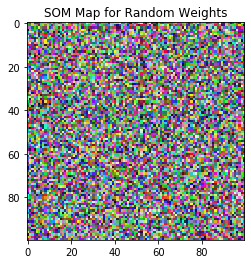

In [211]:
plt.imshow(np.random.random((100, 100, 3)))
plt.title("SOM Map for Random Weights")
plt.show()

##### Explanation of algorithm:
In the next block, I loop through all the given initial sigmas and input vectors for 1000 epochs. In each epoch, all the 24 input vectors are trained. The learning process includes rewarding the winner neuron so that it becomes more like the sample input vector. The weight of neighbouring neurons' weights are also updated according to the given neighborhood function. An important attribute of the learning rate is that the farther away the neighbor is from the winning neuron, the less it learns. For each input vector the sigma and learning rate decay according to the given functions. 

##### Output:
The output shows the SOM maps for different sigmas at different epochs as required.

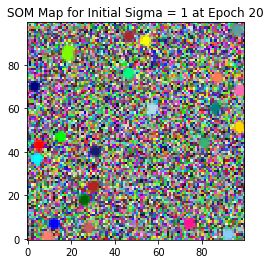

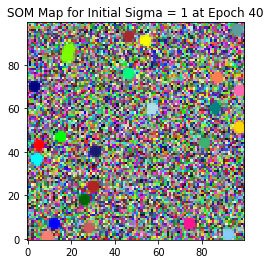

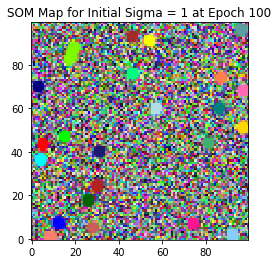

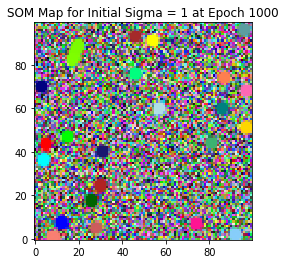

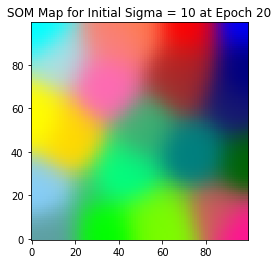

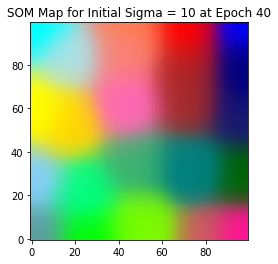

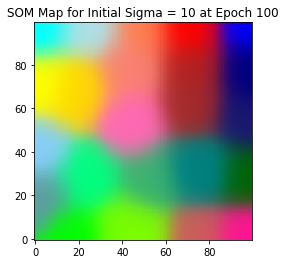

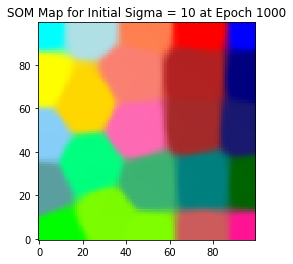

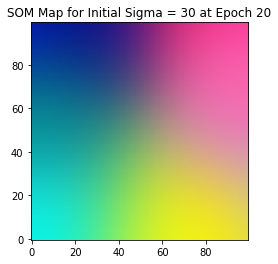

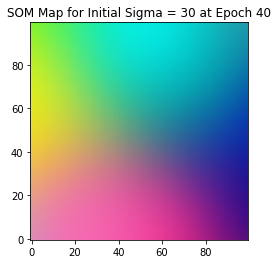

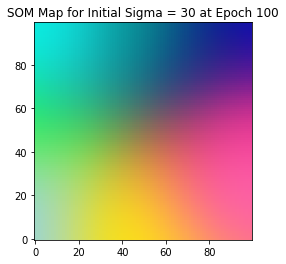

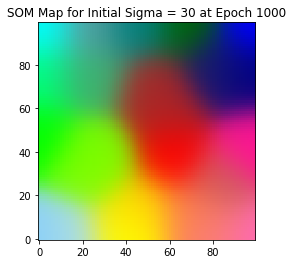

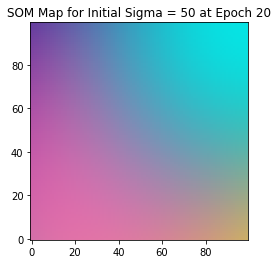

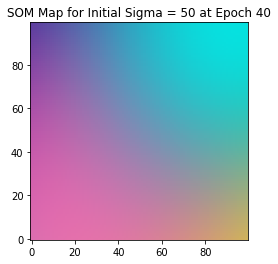

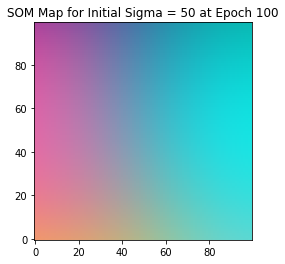

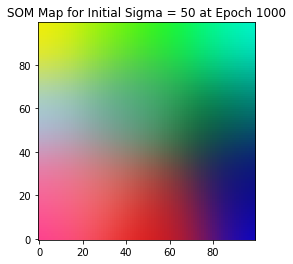

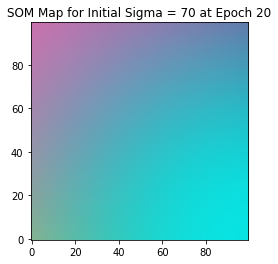

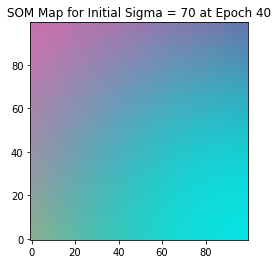

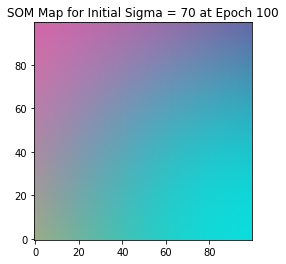

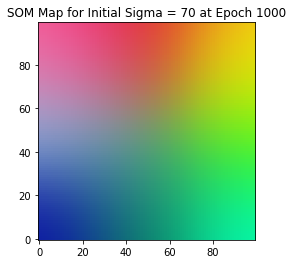

In [213]:
for initial_sigma in sigmas:
    som_maps = []
    som_map = np.random.random((100, 100, 3))
    for i in range(epochs):
        for j in range(data.shape[0]):
            #print(i, j, initial_sigma)
            inp = data[j]

            #Choosing the winning neuron for the given input
            winning_neuron, winning_idx = find_winning_neuron(inp, som_map)

            #Sigma Decay
            sig = initial_sigma * np.exp(-i/epochs)

            #Learning Rate Decay
            lr = initial_lr * np.exp(-i/epochs)

            #Updating weight vectors according to given Neighbourhood function
            for p in range(som_map.shape[0]):
                for q in range(som_map.shape[1]):
                    w = som_map[p][q]
                    distance = np.linalg.norm(np.array([p, q]) - winning_idx)

                    #Calculate influence on other neurons
                    influence = np.exp(-(distance)**2 / (2* (sig**2)))

                    #Update the weights
                    new_weight = w + (lr * influence * (inp - w))
                    som_map[p][q] = new_weight
        if(i==19 or i==39 or i==99 or i==999):
            plt.imshow(som_map, origin='lower')
            plt.title("SOM Map for Initial Sigma = %d at Epoch %d" %(initial_sigma, i+1))
            plt.show()

# b) - Discussion on the output

###### 1. Effect of 𝜎0 on output:

- For 𝜎0 = 1, we can see that all the 4 maps look alot like the SOM for randomly initialized grid. We can see small patches of some colors in the grid but otherwise there is still a lot of disturbance from the initial randomized grid. This maybe because, due to a small 𝜎0, very few neurons are influenced by the winning neuron. This means that very few neurons get a significant update in their weights and hence the colors do not converge at all.  
- For 𝜎0 = 10, we see that clusters start to form. As more neurons are encompassed by the neighborhood function, more neurons are inluenced by the winning neuron and more number of neurons see a significant update in their weights. Thus, wee see some big clusters start to form for particular colors but we see some gaps in the clusters. 
- As 𝜎0 is set to 30 or 50, we see that colors start to converge more clearly. Similar colors start to converge into particular spaces. As 𝜎0 increases to 30 or 50, a large amount of neurons are affected by the winning neuron and they see a huge update in their weights making them more like the input vector that is being mapped. 
- For 𝜎0 = 70, as 𝜎0 is increases even more, the winning neuron starts affecting even more neurons in its large neighborhood. So, we see that colors diffuse completely giving a map where we see patches of Red, Green, Blue, Pink, Teal and Yellow being in separate spaces and converging smoothly towards the centre. 

###### 2. Effect of epochs on output:

- Generally, as the number of epochs increase, the neurons get their weights updated so that each neuron is made more like a certain sample input. This means with each passing epoch, every input comes in and updates the weights of the neurons according to its color and hence as more epochs go by, the more accurate these weights become towards the input vectors. 
- For 𝜎0 = 1,we see that the small patches start to form and grow bigger in size as epochs increase. The green patch in top left of map increases its size from 20th epoch to 1000th epoch.
- For 𝜎0 = 10, we see that the colors look quite blurry in 20th epoch as the weights haven't been updated properly. In 1000th epoch, we see a more crisp image of distinct patches. 
- For 𝜎0 = 30 or 50 or 70, we see that colors start to converge pretty quickly as we see a diffused map in as early as 20th epoch. As the epochs increase, the colors start to separate from each other. And towards the 1000th epoch, where all the weights have been modified 1000 times according to the 24 given input vectors, we see that map has converged elegantly and has reached a state of equilibrium meaning the neurons have been trained more accurately or the weights of the neurons are more accurate compared to as they were in initial epochs. 

Overall, see that sometimes map converges pretty quickly and smoothly while other times the it gets difficult for the map to reach a state of quilibrium and thus we see some gaps in the clusters. 

### Reference:

https://github.com/bvsk35/Self-Organizing-Map/blob/master/SOM_Color_Palette.ipynb